<a href="https://colab.research.google.com/github/HWMV/AIFFEL_Quest1/blob/master/Machine_Learning/Main_quest2/Go_poketmon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **가랏! 포켓몬**

# 1.**데이터 셋 만들기**

In [79]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [80]:
# 데이터 불러오기

url = "https://raw.githubusercontent.com/HWMV/AIFFEL_Quest1/master/Main_quest/Main_quest2/Pokemon.csv"
dataset = pd.read_csv(url)

In [81]:
# 데이터 샘플 확인
dataset.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [82]:
# 원본 데이터 유지(.copy)
poketmon = dataset.copy()
# 800마리 포켓몬과 13개의 피처 확인
poketmon.shape

(800, 13)

In [83]:
# 전설의 포켓몬 여부 확인이 목적 (target = legendary == True) 일반은 False
legendary = poketmon[poketmon["Legendary"]==True].reset_index(drop=True)
# 전설의 포켓몬 65마리 확인
print(legendary.shape)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [84]:
# 일반 포켓몬 확인
ordinary = poketmon[poketmon["Legendary"]==False].reset_index(drop=True)# [[YOUR CODE]]
# 일반몬스터 735마리 확인
print(ordinary.shape)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# **2. EDA (데이터 분석/처리)**

In [85]:
# 빈 데이터(결측치) 확인
# Type 2 유형 결측치 확인
# Type 2가 없는 포켓몬이 386마리
poketmon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [86]:
# 전체 컬럼 이해하기
# 큰 데이터셋이 아니므로 하나하나 보자 전체로
# 13개의 컬럼수와 컬럼명 확인
print(len(poketmon.columns))
poketmon.columns

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [87]:
# 컬럼 별 type 확인
# bool 1ea, int 9ea, object 3ea 확인
poketmon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [88]:
# '#' 1번쨰 컬럼 몇 종류의 값 확인
# 721개를 가짐, set는 중복 데이터를 가질 수 없으니 800개가 안되서 중복이 있음
len(set(poketmon["#"]))

721

In [89]:
# '#' 같은 값을 가지는 리자몽 확인 (같은 값을 가지는게 6번인지 어떻게 알지?)
poketmon[poketmon["#"]==6]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [90]:
# Name 컬럼
# 포켓몬 수와 같다. Name 전부 다른 값 unique
len(set(poketmon["Name"]))

800

In [91]:
# Type1 &Type2 포켓몬 속성 확인
# 무작위 두마리 확인
# Charizard는 속성 2개, Wartortle 1개
poketmon.loc[[6,10]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,1,False


In [92]:
# 각 속성의 종류가 몇가지 인지 확인
# Type 1은 18개, 2는 19개 확인
len(list(set(poketmon["Type 1"]))), len(list(set(poketmon["Type 2"])))

(18, 19)

In [93]:
# 다른 타입 1가지 확인 (파이썬 차집합 함수 활용)
# Type 2에 nan 값이 다름 확인
set(poketmon["Type 2"]) - set(poketmon["Type 1"])

{nan}

In [94]:
# Type 변수에 저장, 이거 어디다가 쓰려고 저장했을까? 일반/전설 속성 분포 확인 위함
types = list(set(poketmon["Type 1"]))
# types2 = list(set(poketmon["Type 2"]))
# type 18 ea, type 명 확인
print(len(types))
print(types)

18
['Poison', 'Fire', 'Dark', 'Steel', 'Flying', 'Water', 'Normal', 'Bug', 'Psychic', 'Ground', 'Dragon', 'Grass', 'Electric', 'Fairy', 'Ghost', 'Rock', 'Ice', 'Fighting']


In [95]:
# Type 변수에 저장, 이거 어디다가 쓰려고 저장했을까? 일반/전설 속성 분포 확인 위함
types2 = list(set(poketmon["Type 2"]))
# types2 = list(set(poketmon["Type 2"]))
# type 18 ea, type 명 확인
print(len(types2))
print(types2)

19
['Fire', 'Normal', 'Ground', 'Rock', 'Steel', 'Psychic', 'Grass', 'Electric', 'Ice', 'Water', 'Bug', nan, 'Fairy', 'Ghost', 'Fighting', 'Poison', 'Dark', 'Flying', 'Dragon']


In [96]:
# pandas isna() 함수 활용 (Type 2에 NaN 수 확인)
# 386마리가 NaN 값 확인
poketmon["Type 2"].isna().sum()

386

In [97]:
legendary["Type 1"].head(5)

0         Ice
1    Electric
2        Fire
3     Psychic
4     Psychic
Name: Type 1, dtype: object

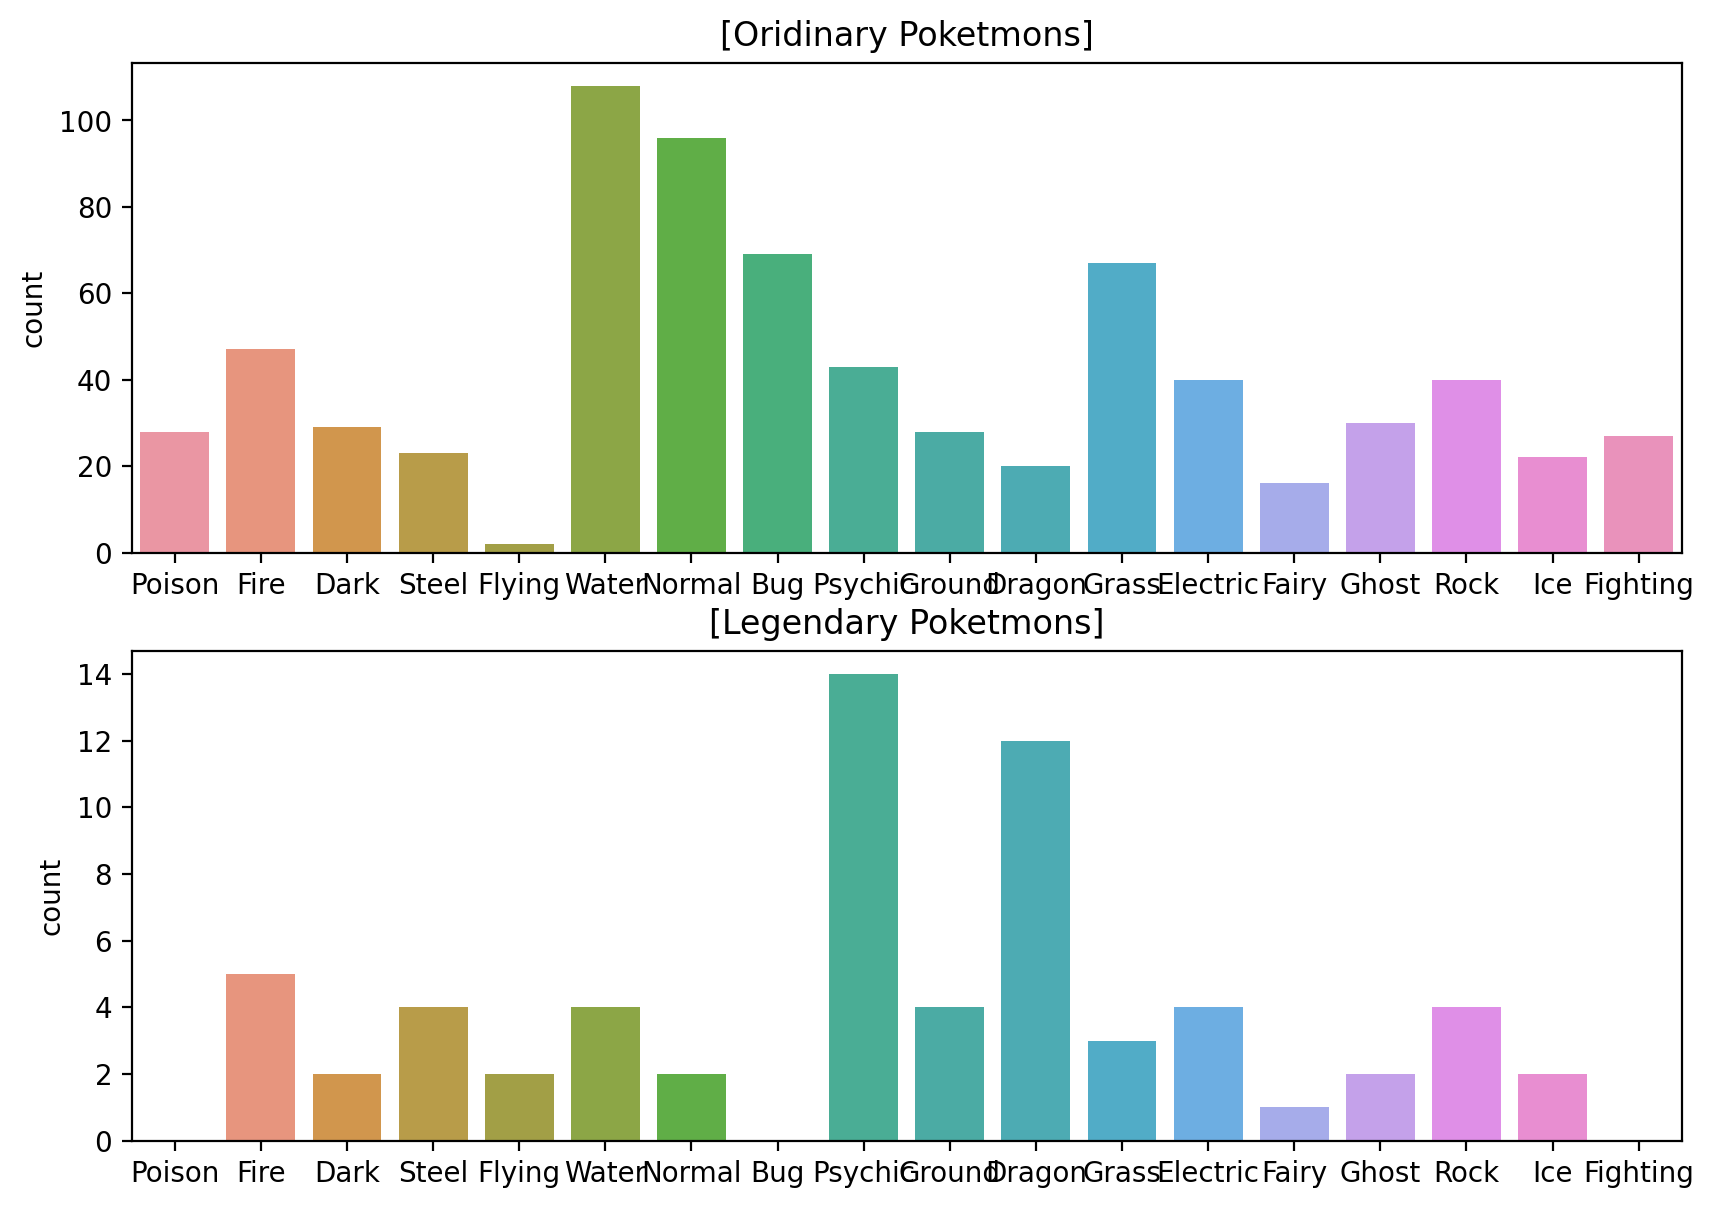

In [98]:
# Type 1 데이터 분포 plot
# 일반, 전설 시각화 : 일반, 전설 포켓몬의 속성 분포 확인을 위함
plt.figure(figsize=(10,7))

# 일반 : 속성을 x축 세팅
plt.subplot(211)      # 211 : nrows = 2, ncols = 1, index = 1
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Oridinary Poketmons]")
# 전설 세팅
plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Poketmons]")

plt.show()

In [99]:
# Type1별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(poketmon, index="Type 1", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


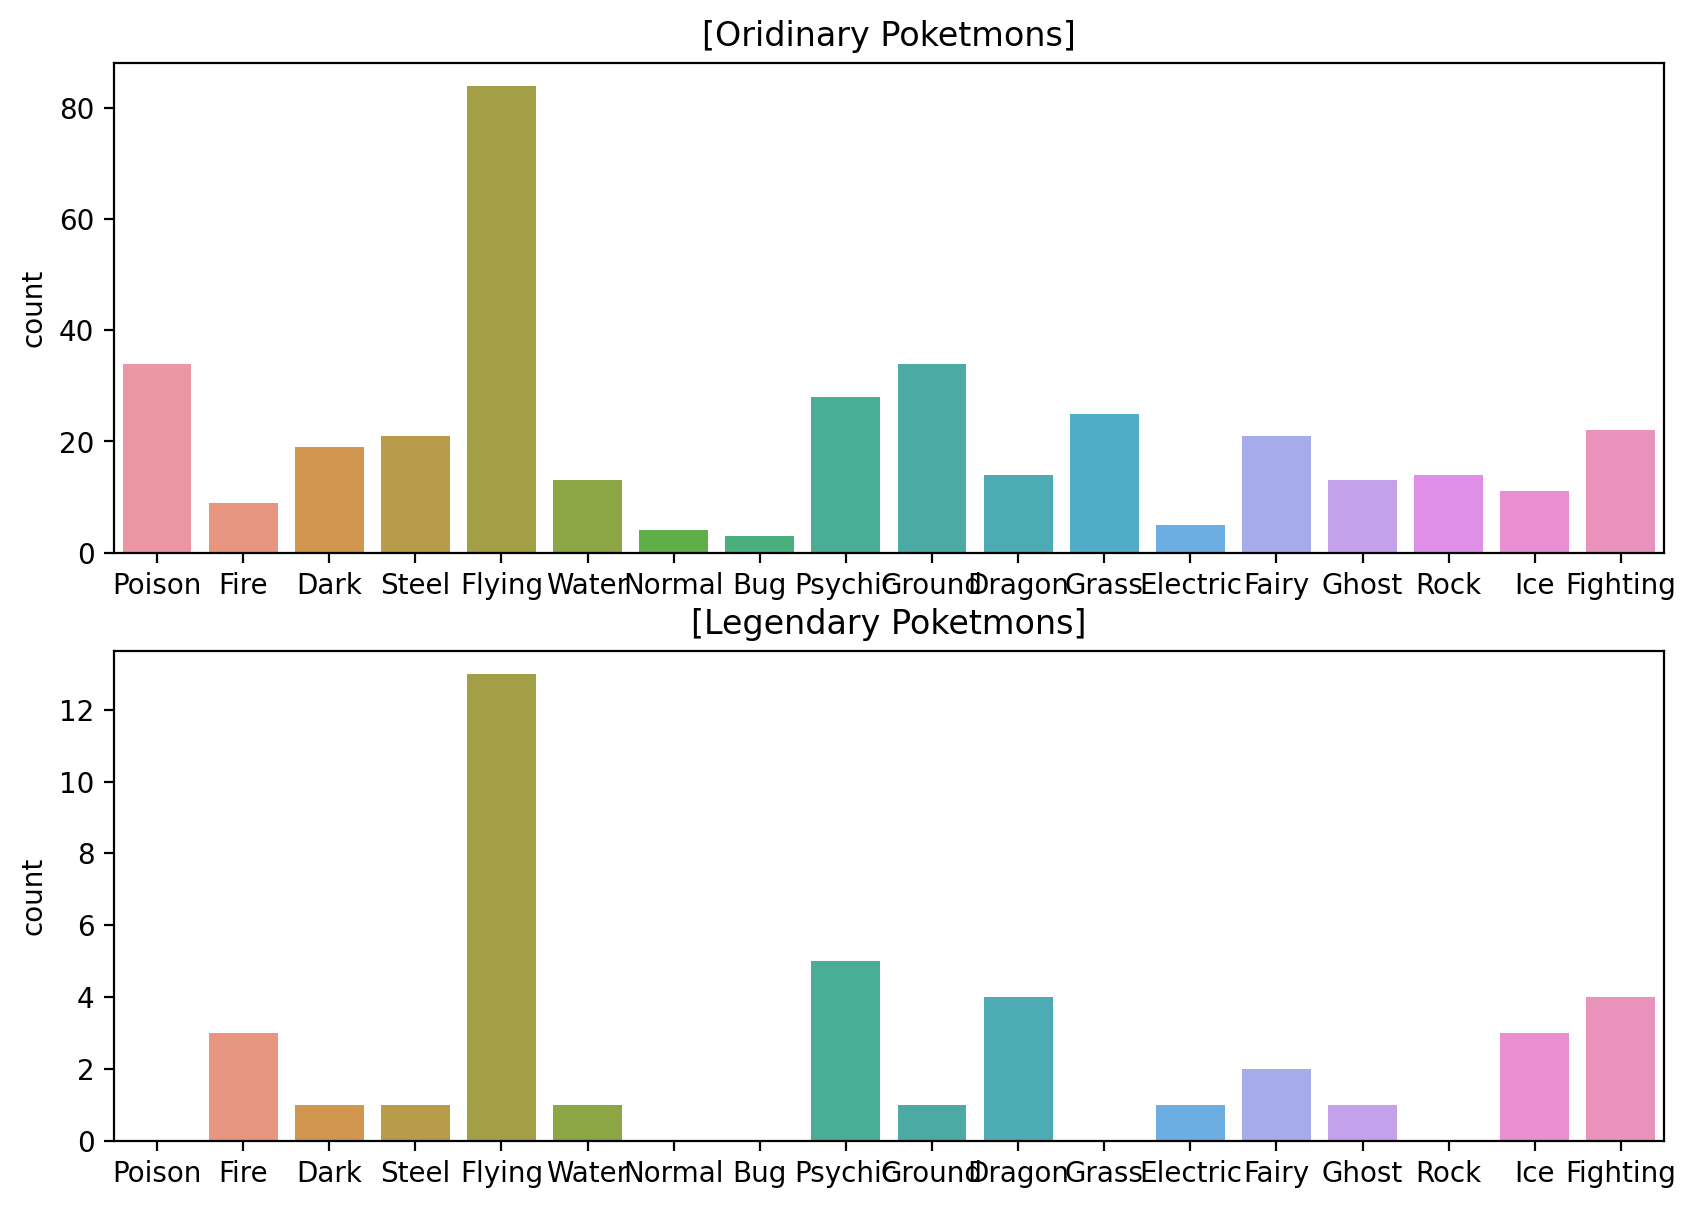

In [100]:
# Type 2 데이터 분포 plot
plt.figure(figsize=(10,7))

# 일반 : 속성을 x축 세팅
plt.subplot(211)      # 211 : nrows = 2, ncols = 1, index = 1
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Oridinary Poketmons]")
# 전설 세팅
plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Poketmons]")

plt.show()

In [101]:
# Type2 별로 Legendary의 비율을 보여주는 피벗 테이블
pd.pivot_table(poketmon, index="Type 2", values="Legendary").sort_values(by=["Legendary"], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


In [103]:
# Total : 모든 스탯의 총합
poketmon.head(3) # 스탯 컬럼명 확인 "HP"~"Speed"
stats = ['HP',	'Attack',	'Defense',	'Sp. Atk',	'Sp. Def',	'Speed']
stats

['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [105]:
# Total 값 맞는지 첫 번째 몬 검증
print("#0 pokemon: ", poketmon.loc[0, "Name"])
print("total: ", int(poketmon.loc[0, "Total"]))
print("stats: ", list(poketmon.loc[0, stats]))
print("sum of all stats: ", sum(list(poketmon.loc[0, stats])))

#0 pokemon:  Bulbasaur
total:  318
stats:  [45, 49, 49, 65, 65, 45]
sum of all stats:  318
